# Exploring Movie Data

Exploring and visualizing movie data scraped from Box Office Mojo. Make sure to format your plots properly with axis labels and graph titles at the very least.

-------

 ### Data Prep
 
- Import in the standard libraries (NumPy, pandas, matplotlib)
- Read in the CSV
- Explore the data set, the columns and the types

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')       # Use ggplot style plots
%matplotlib inline

movies = pd.read_csv("2013_movies.csv")
print(movies.shape)
print(movies.columns)
print(movies.dtypes)


movies.head(10)


(100, 7)
Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate'],
      dtype='object')
Title                  object
Budget                float64
DomesticTotalGross      int64
Director               object
Rating                 object
Runtime                 int64
ReleaseDate            object
dtype: object


,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.000000,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.000000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.000000,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00
5,Gravity,100000000.000000,274092705,Alfonso Cuaron,PG-13,91,2013-10-04 00:00:00
6,Monsters University,nan,268492764,Dan Scanlon,G,107,2013-06-21 00:00:00
7,The Hobbit: The Desolation of Smaug,nan,258366855,Peter Jackson,PG-13,161,2013-12-13 00:00:00
8,Fast & Furious 6,160000000.000000,238679850,Justin Lin,PG-13,130,2013-05-24 00:00:00
9,Oz The Great and Powerful,215000000.000000,234911825,Sam Raimi,PG,127,2013-03-08 00:00:00


In [250]:
# Any reason for the difference here ?
movies['ReleaseDate']= pd.to_datetime(movies['ReleaseDate'])
#movies['ReleaseDate']= movies['ReleaseDate'].apply(pd.to_datetime)

### Exercise 1 
 
- Plot Domestic Total Gross over Time.
- Try a scatterplot and a line plot.

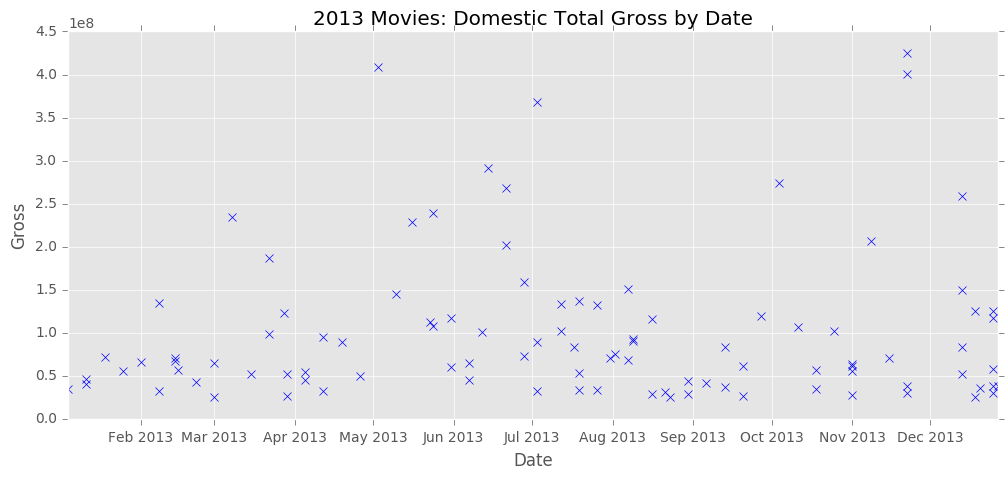

In [251]:
#movies_nona = movies.notnull()
# Why didnt the following work ?
#movies.plot(kind="scatter",     # Create a scatterplot
#              x="ReleaseDate",         
#              y="Budget",          
#              figsize=(5,5),
#              ylim=(0,250000000))

fig=plt.figure(figsize=(12,5))
plt.plot(movies['ReleaseDate'], movies['DomesticTotalGross'], 'bx')
plt.xlabel("Date")
plt.ylabel("Gross")
plt.title("2013 Movies: Domestic Total Gross by Date")

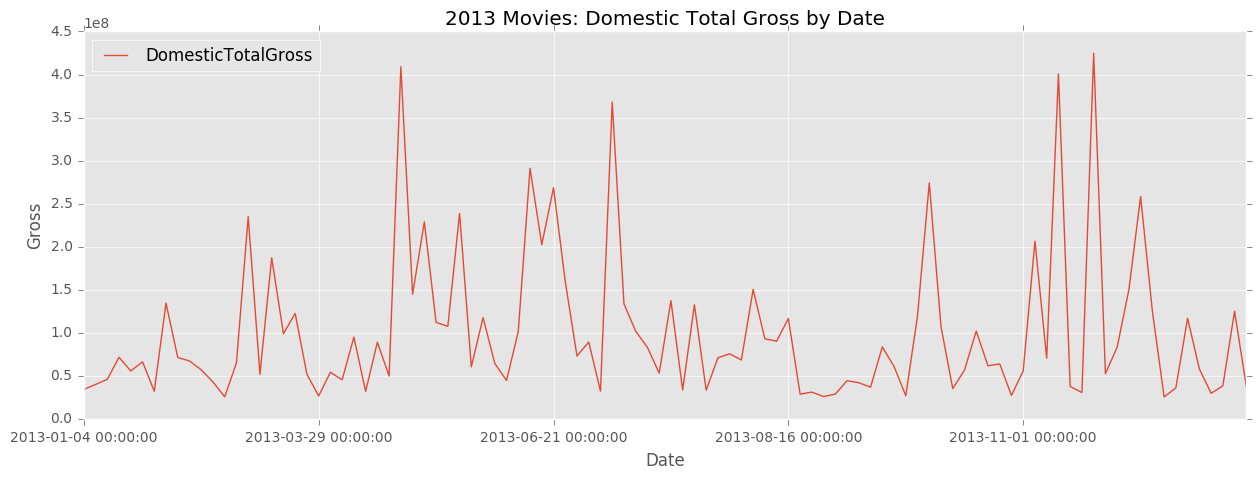

In [260]:
# 
fig=plt.figure(figsize=(15,5))
ax= plt.gca()
movies.plot(x= 'ReleaseDate', y='DomesticTotalGross', ax=ax)
movies= movies.sort_values(by=['ReleaseDate'])
plt.xlabel("Date")
plt.ylabel("Gross")
plt.title("2013 Movies: Domestic Total Gross by Date")
plt.show()

### Exercise 2

- Plot Runtime vs. Domestic Total Gross. 
- Try a scatterplot and a line plot.

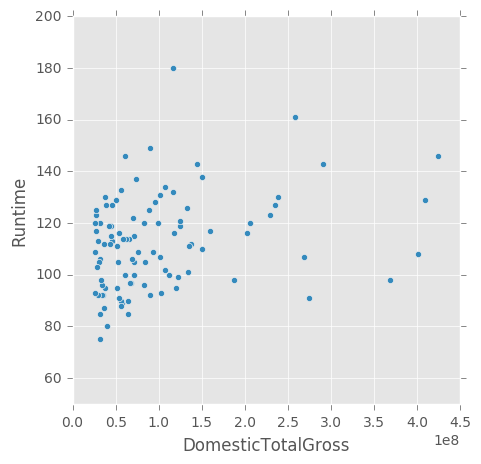

In [225]:
movies.plot(kind="scatter",     # Create a scatterplot
              x="DomesticTotalGross",         
              y="Runtime",          
              figsize=(5,5),
              ylim=(50,200))

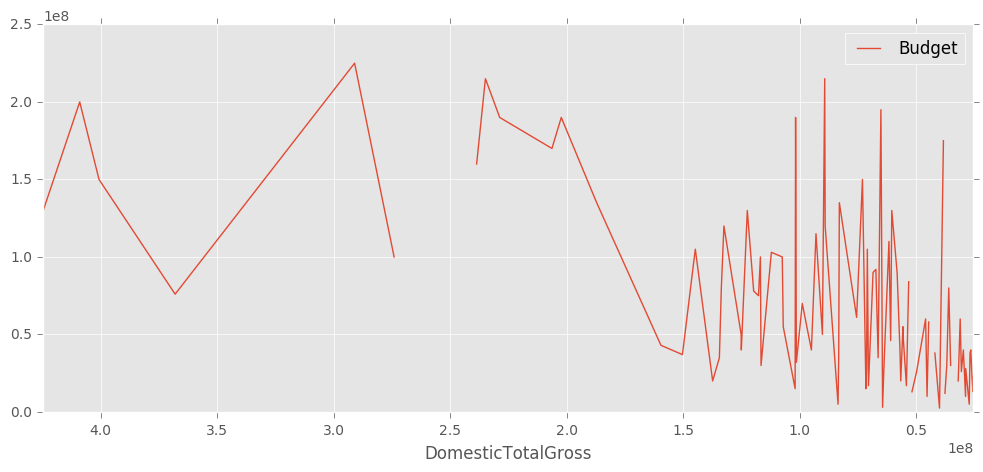

In [226]:
# This graph might work
movies.plot(x="DomesticTotalGross",
              y="Budget",         
              figsize=(12,5),
              ylim=(0,250000000))

### Exercise 3

- Group your data by Rating.
- Find the average runtime and domestic total gross at each level of Rating.

In [228]:
movies_rating = movies.groupby(['Rating'])
movies_rating.describe()
print(movies_rating.Runtime.mean())
print(movies_rating.DomesticTotalGross.sum())

Rating
G       107.000000
PG       99.933333
PG-13   117.510638
R       110.729730
Name: Runtime, dtype: float64
Rating
G         268492764
PG       1967035741
PG-13    5238139144
R        2586019873
Name: DomesticTotalGross, dtype: int64


/Users/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [227]:
pd.options.display.float_format= '{:2f}'.format

In [266]:

movies_rating.count()

,Title,Budget,DomesticTotalGross,Director,Runtime,ReleaseDate
Rating,,,,,,
G,1,0,1,1,1,1
PG,15,15,15,14,15,15
PG-13,47,41,47,45,47,47
R,37,33,37,36,37,37


In [273]:
# HOW TO MAKE THE INDEX SHOW WHICH RATING IS RELEVANT ??
movies_rating.head(5)

,Budget,Director,DomesticTotalGross,ReleaseDate,Runtime,Title
0,130000000.000000,Francis Lawrence,424668047,2013-11-22,146,The Hunger Games: Catching Fire
1,200000000.000000,Shane Black,409013994,2013-05-03,129,Iron Man 3
2,150000000.000000,Chris BuckJennifer Lee,400738009,2013-11-22,108,Frozen
3,76000000.000000,Pierre CoffinChris Renaud,368061265,2013-07-03,98,Despicable Me 2
4,225000000.000000,Zack Snyder,291045518,2013-06-14,143,Man of Steel
5,100000000.000000,Alfonso Cuaron,274092705,2013-10-04,91,Gravity
6,nan,Dan Scanlon,268492764,2013-06-21,107,Monsters University
7,nan,Peter Jackson,258366855,2013-12-13,161,The Hobbit: The Desolation of Smaug
9,215000000.000000,Sam Raimi,234911825,2013-03-08,127,Oz The Great and Powerful
13,135000000.000000,Kirk De MiccoChris Sanders,187168425,2013-03-22,98,The Croods


### Exercise 4

- Plot Release Date by Domestic Total Gross. Segment by Rating.
- Have all 4 groups on one plot.
- Have 4 separate plots, but part of the same matplotlib figure.

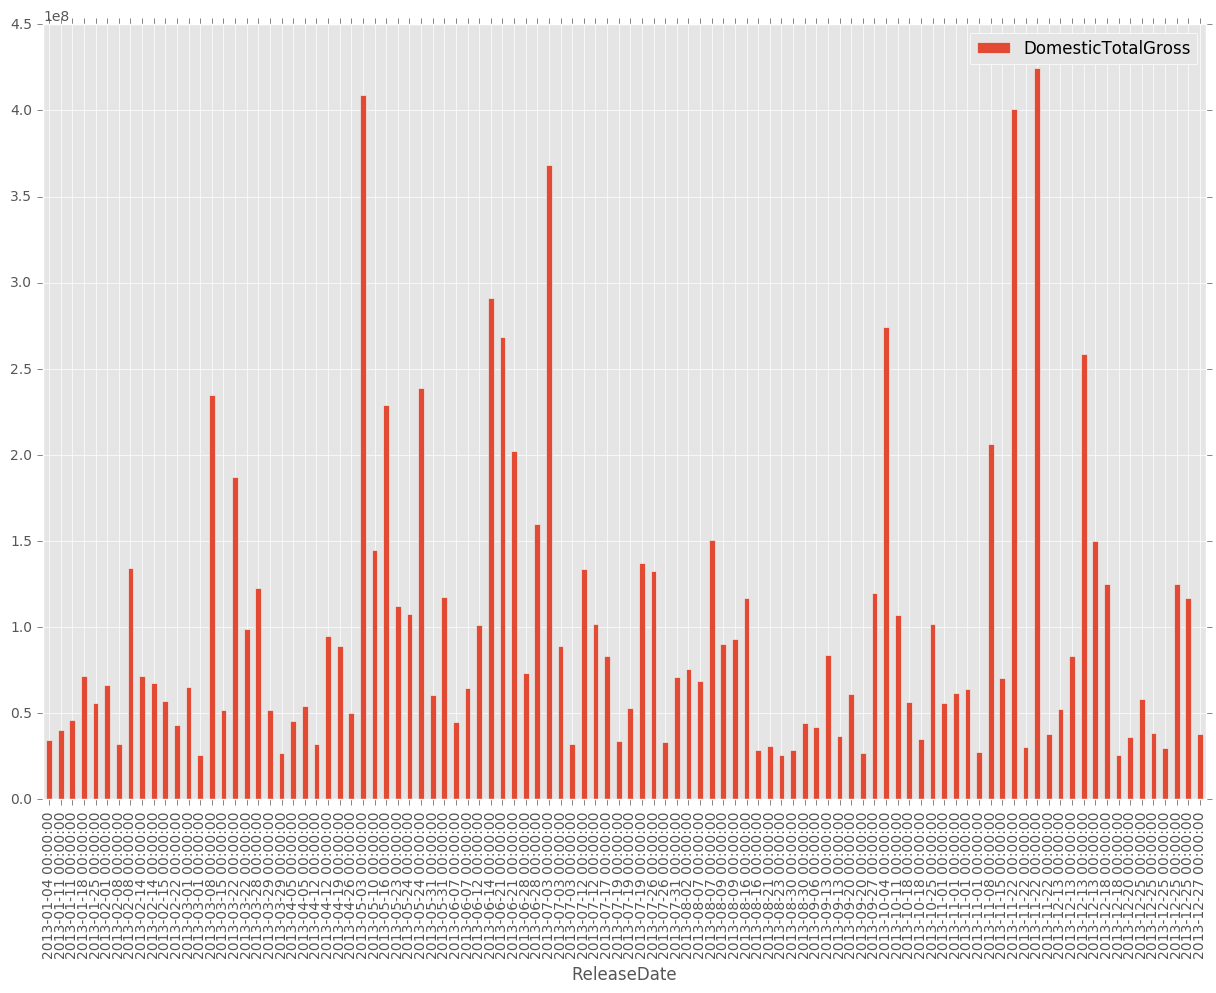

In [296]:
#movies_rating_ctab.head()
movies_indexed =movies.set_index("Rating")
movies_indexed.head()

movies_indexed.plot(kind="bar",
                    x='ReleaseDate',
                    y='DomesticTotalGross',
                  figsize=(15,10))

/Users/anaconda/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735040.0, right=735040.0
  'left=%s, right=%s') % (left, right))


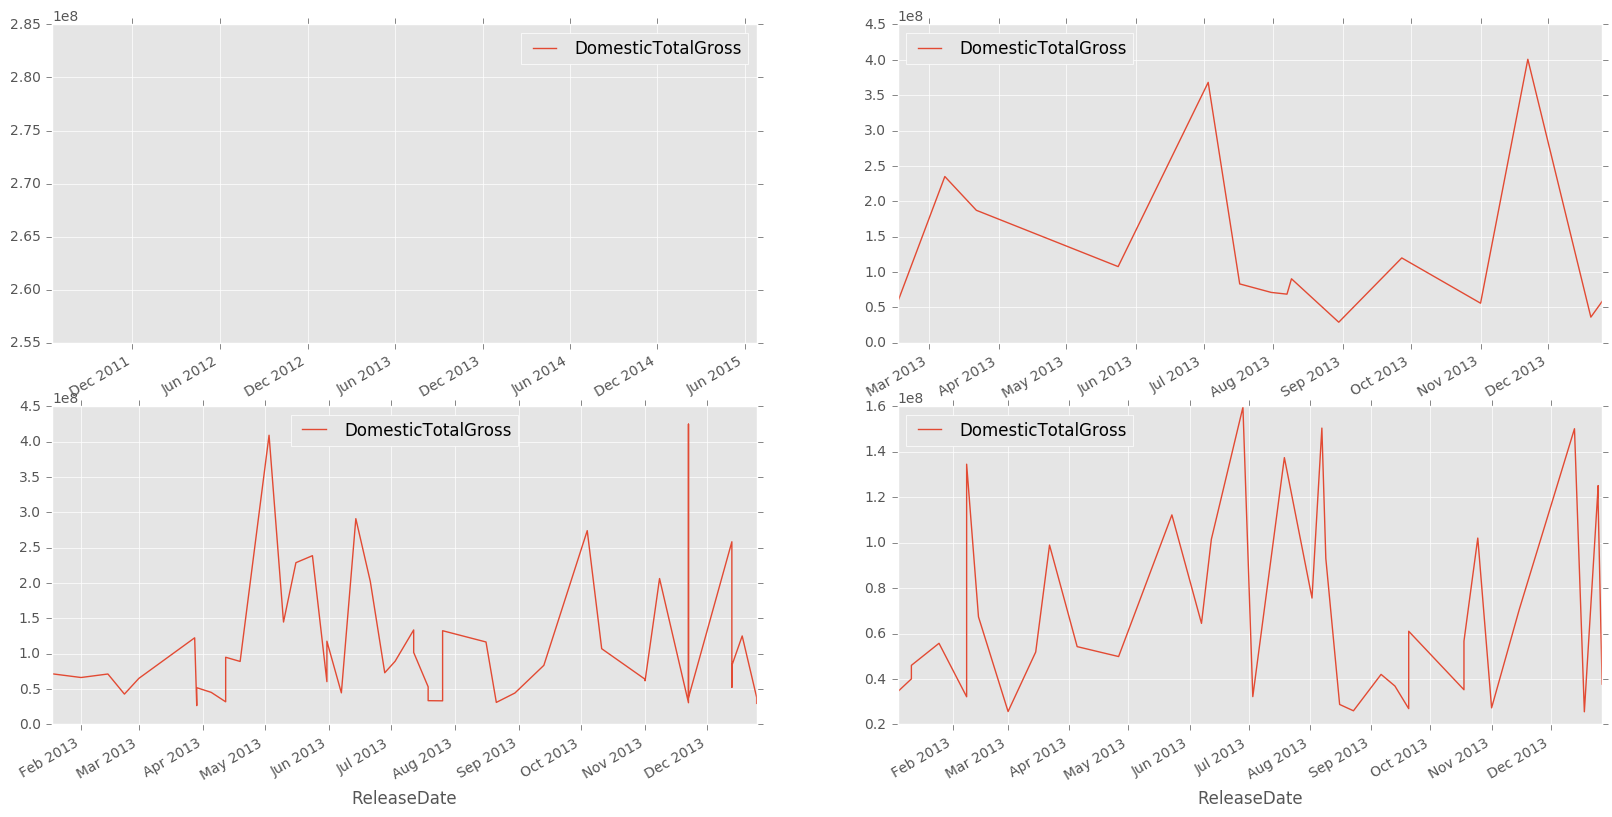

In [297]:
plt.figure(figsize=(100,50))

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
# ax[0,1].plot(movies_rating.get_group('R'))

movies_rating.get_group('G').plot(ax=ax[0,0], x='ReleaseDate', y='DomesticTotalGross')
movies_rating.get_group('PG').plot(ax=ax[0,1], x='ReleaseDate', y='DomesticTotalGross')
movies_rating.get_group('PG-13').plot(ax=ax[1,0], x='ReleaseDate', y='DomesticTotalGross')
movies_rating.get_group('R').plot(ax=ax[1,1], x='ReleaseDate', y='DomesticTotalGross')

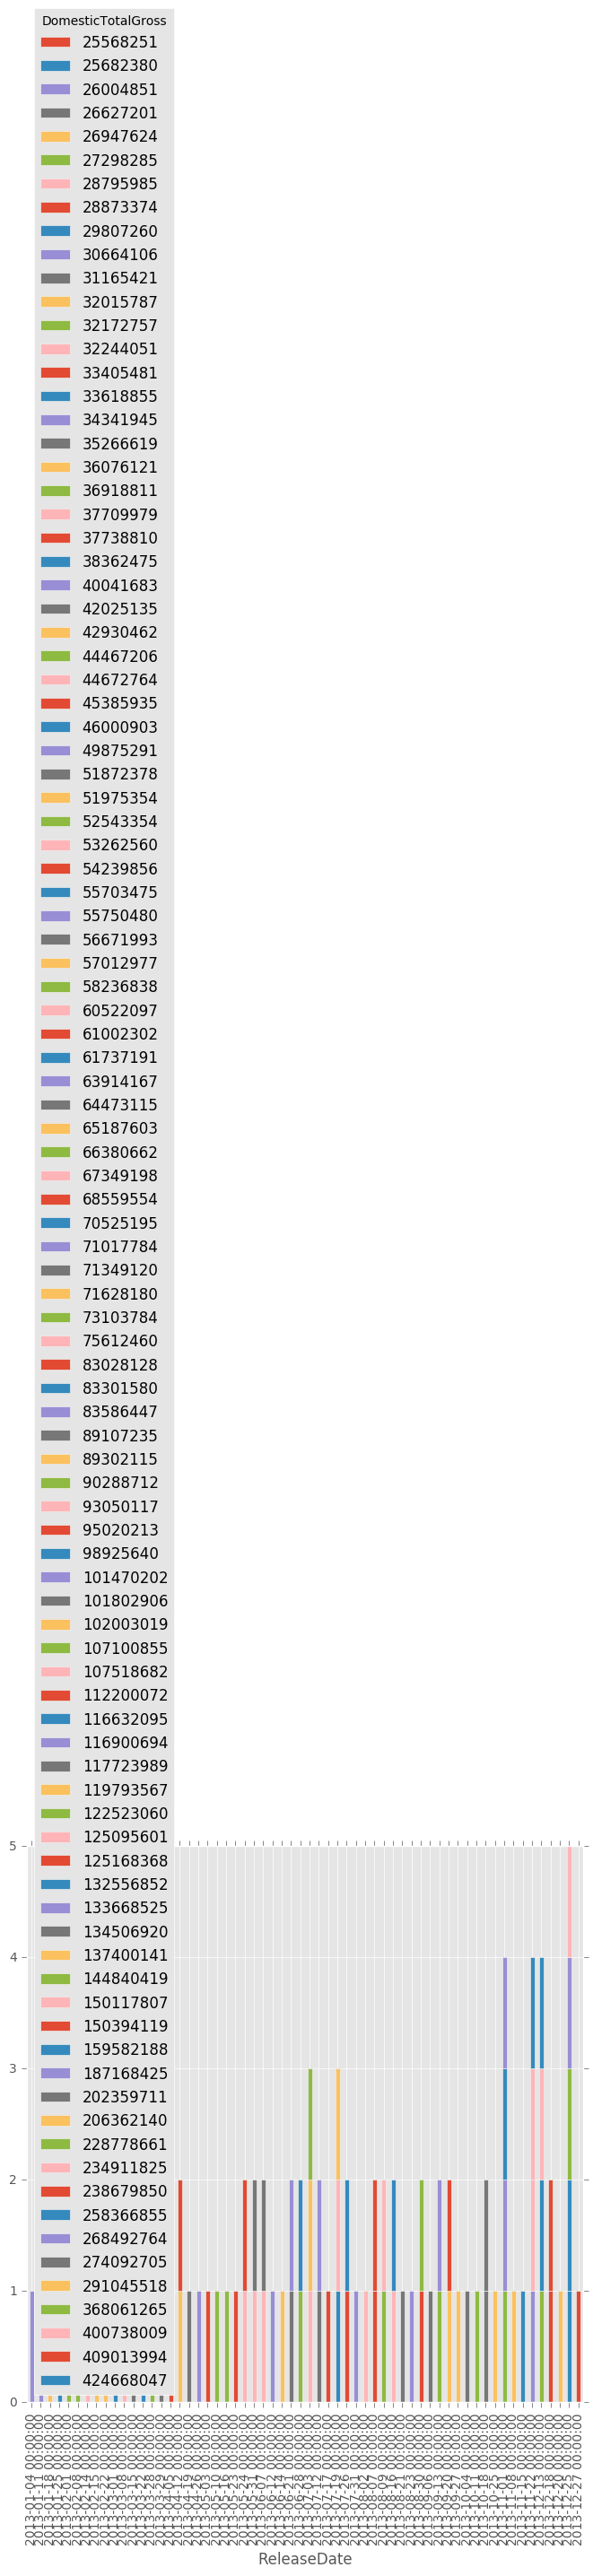

In [289]:
## HOW CAN I STACK THE BARS BELOW BY RATING? 

#movies_rating_ctab = movies()
#domestic_gross = pd.to_numeric(movies.DomesticTotalGross)
#release_date = pd.to_datetime(movies.ReleaseDate)
#movies.DomesticTotalGross = domestic_gross
#movies.ReleaseDate = release_date
#type(movies.ReleaseDate)
#movies.plot(kind="bar",
#            y="DomesticTotalGross",
#             x="ReleaseDate",         
#              figsize=(10,10))


movies_rating_ctab = pd.crosstab(index=movies["ReleaseDate"], 
                          columns=movies["DomesticTotalGross"])
movies_rating_ctab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

/Users/anaconda/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735040.0, right=735040.0
  'left=%s, right=%s') % (left, right))


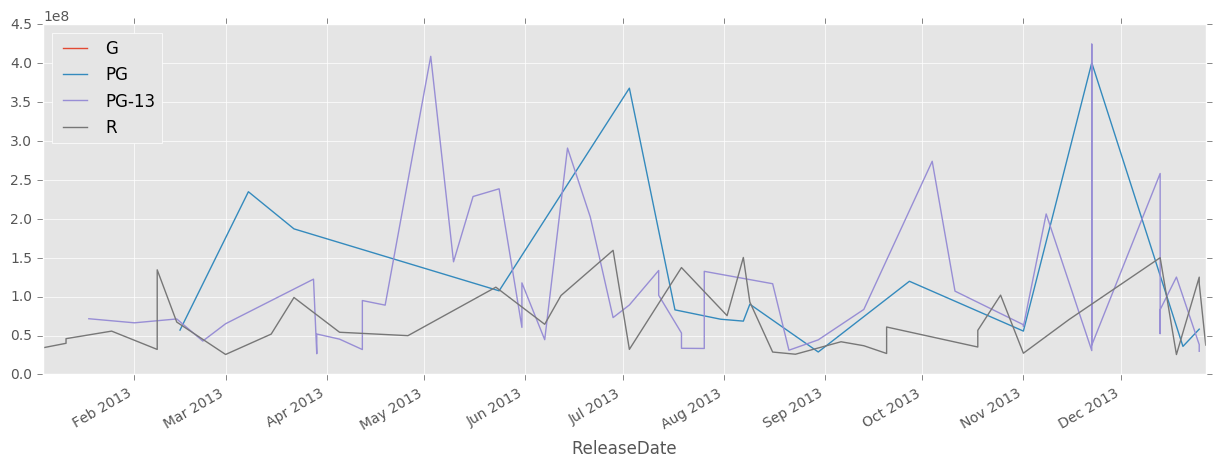

In [236]:
fig= plt.figure(figsize=(15,5))
ax= plt.gca()
labels = []

for name, group in movies.groupby('Rating'):
    group.plot(x='ReleaseDate', y='DomesticTotalGross', ax=ax, label=name)
    labels.append(name)
    
plt.legend(labels, loc='best')    

/Users/anaconda/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


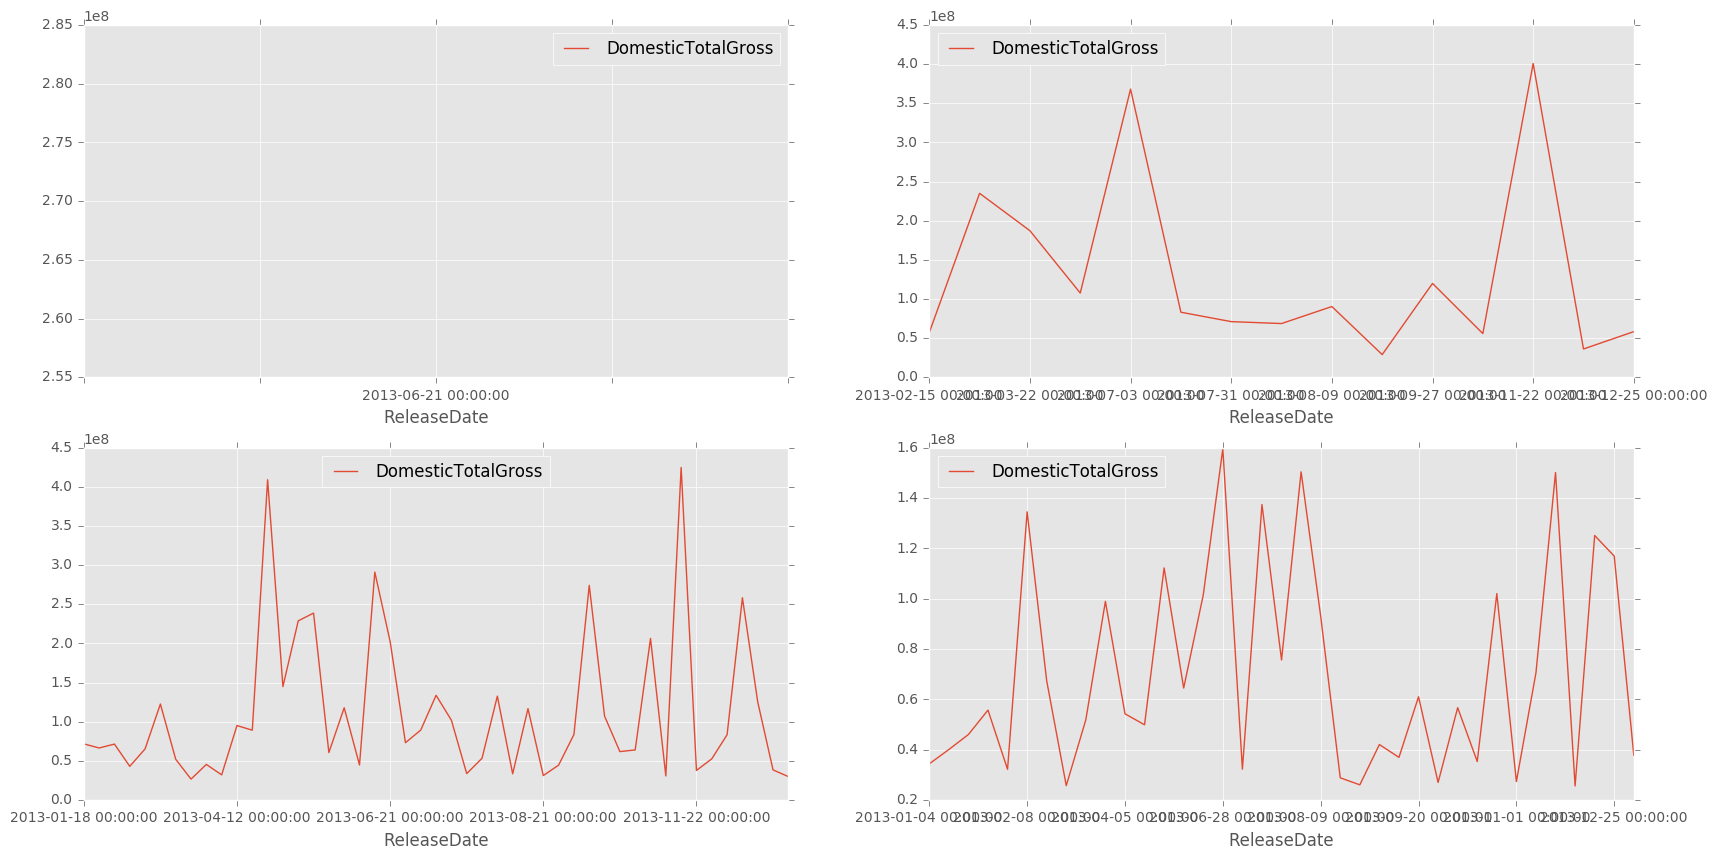

In [298]:
## GOT SOME FORMATTING WORK TO DO 
movies = movies.sort_values(by=['ReleaseDate', 'Rating'])
group_g = movies[movies['Rating'] == 'G']
group_pg= movies[movies['Rating'] == 'PG']
group_pg13= movies[movies['Rating'] == 'PG-13']
group_r= movies[movies['Rating'] == 'R']

fig, ax = plt.subplots(2, 2, figsize=(20, 10))

ax= plt.subplot(2,2,1)
group_g.plot(x="ReleaseDate", y="DomesticTotalGross", ax=ax,)
ax= plt.subplot(2,2,2)
group_pg.plot(x="ReleaseDate", y="DomesticTotalGross", ax=ax,)
ax= plt.subplot(2,2,3)
group_pg13.plot(x="ReleaseDate", y="DomesticTotalGross", ax=ax,)
ax= plt.subplot(2,2,4)
group_r.plot(x="ReleaseDate", y="DomesticTotalGross", ax=ax,)

### Exercise 5

- What director in your dataset has the highest gross per movie (highest avg gross)?
- Find the top 3 directors with the highest average gross with "one-hit-wonders" removed.

In [166]:
# - What director in your dataset has the highest gross per movie (highest avg gross)?
new_movie= pd.DataFrame({"Director": movies.Director,
                         "Gross": movies.DomesticTotalGross})
new_movie= new_movie.dropna()
new_movie.groupby("Director")
new_movies_grouped = new_movie.groupby(['Director'])
new_movie_top_director = new_movies_grouped.mean().sort('Gross', ascending = False)
new_movie_top_director[0:1]


/Users/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Gross
Director,
Francis Lawrence,424668047


In [241]:
# - Find the top 3 directors with the highest average gross with "one-hit-wonders" removed.
## FROM WHAT I SEE, IT TURNS OUT THAT THERE ARE ONLY 3 DIRECTORS WITH >1 MOVIE
movies_cross_tab= pd.crosstab(index= new_movie["Director"],        # Make a crosstab
                      columns="count")
directors_more_than_one=movies_cross_tab.where(movies_cross_tab['count'] >1)

directors_more_than_one= directors_more_than_one.dropna()
directors_more_than_one


col_0,count
Director,
James Wan,2.000000
Malcolm D. Lee,2.000000
Tyler Perry,2.000000


### Exercise 6

- Bin the dataset into months and make a bar graph with error bars of gross each year

In [179]:
data_col =pd.to_datetime(movies.ReleaseDate)

gross_by_date= pd.DataFrame({"Date_Released": data_col ,
                         "Gross": movies.DomesticTotalGross})
date_sorted= gross_by_date.sort("Date_Released")

/Users/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [281]:
# Generic code to use >>> .dt.month
#date_sorted['Month']= date_sorted['Date_Released'].dt.month

gross_by_month= date_sorted.groupby("Month").sum().reset_index()
gross_by_month.head()

,Month,Gross
0,1,247716186
1,2,471702096
2,3,864873866
3,4,365644317
4,5,1419277764


In [283]:
months= {1:"Jan", 2:"Feb", 3:"Mar", 4: "April", 5: "May", 6: "June", 7:"July", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}

def f(x):
    month_label= months[x]
    return month_label

gross_by_month['Month_label'] = gross_by_month['Month'].apply(f)
gross_by_month.head()

,Month,Gross,Month_label
0,1,247716186,Jan
1,2,471702096,Feb
2,3,864873866,Mar
3,4,365644317,April
4,5,1419277764,May


In [304]:
gross_by_month2= date_sorted.groupby("Month")
gross_by_month2.get_group(4)

,Date_Released,Gross,Month
64,2013-04-05,54239856,4
71,2013-04-05,45385935,4
88,2013-04-12,32015787,4
36,2013-04-12,95020213,4
40,2013-04-19,89107235,4
69,2013-04-26,49875291,4


In [311]:
temp= gross_by_month2.get_group(4)
#np.std(temp, ddof=1)/math.sqrt(len(temp))
#math.sqrt(len(temp))
np.std(temp, ddof=1)


Gross   25301038.686716
Month          0.000000
dtype: float64

In [286]:
# Why does my DF not recognize 'agg' function?
import math
monthmeans = gross_by_month2['Gross'].agg({
        'count':'count', 'mean': 'mean', 'sum': 'sum', 'std': 'std', 'sem': lambda x:np.std(x, ddof=1)/math.sqrt(len(x))
    })

print(monthmeans)


            sem       mean         sum  count              std
Month                                                         
1       6555914   49543237   247716186      5  14659469.436013
2      12409272   67386013   471702096      7  32831848.633773
3      24413138   96097096   864873866      9  73239416.714244
4      10329105   60940719   365644317      6  25301038.686716
5      39518588  177409720  1419277764      8 111775447.286685
6      33658260  150650005  1205200046      8  95199936.150610
7      26387322  105780721  1269368663     12  91408365.128184
8      12459149   68531263   753843894     11  41322322.483494
9      14216539   61712314   370273886      6  34823268.773557
10     42012719  115027038   575135191      5  93943296.171180
11     48572933  137936759  1379367599     10 153601101.135792
12     18537593   87483385  1137284014     13  66838245.202253


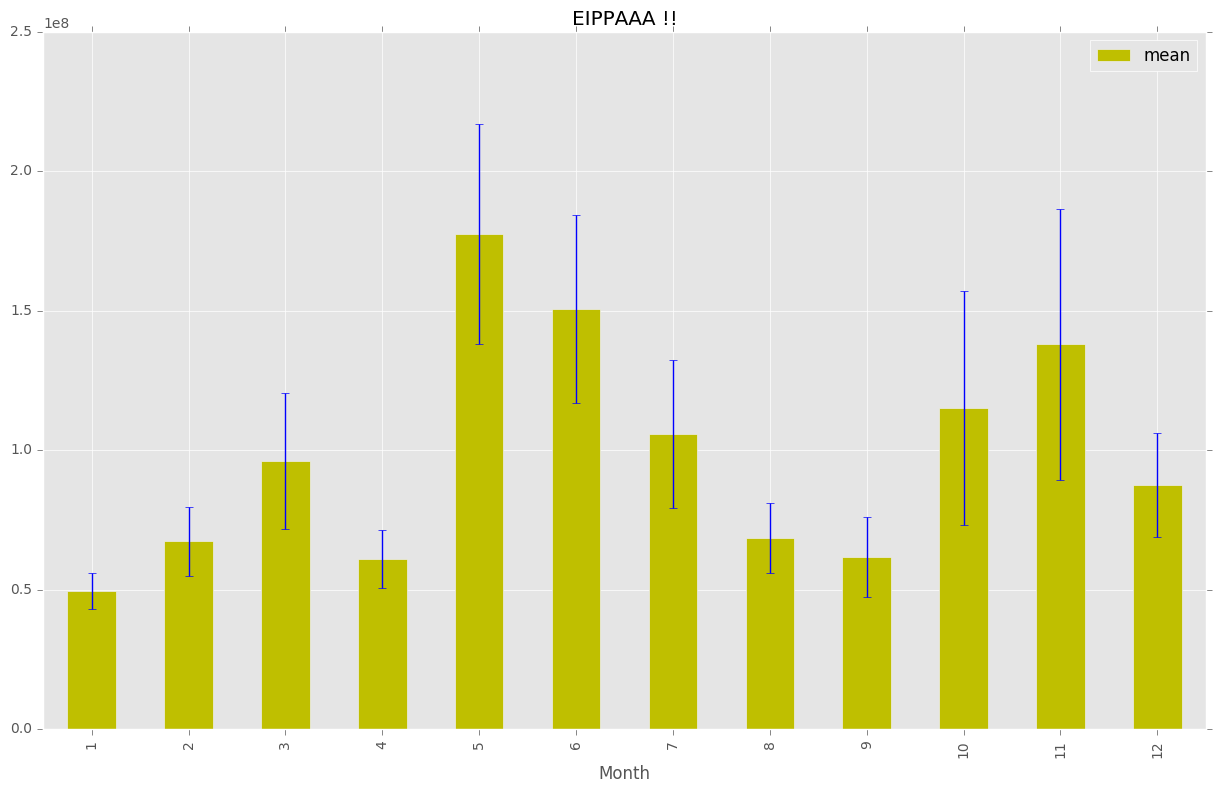

In [288]:
fig = plt.figure(figsize = (15,9))
ax= plt.gca()

p= monthmeans.plot(y="mean", kind="bar",yerr=monthmeans['sem'],ax=ax, color="y", ecolor='b')
plt.title("EIPPAAA !!")
